In [2]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load dataset
df = pd.read_csv("tesla.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [76]:
print("Columns are in Data_set", df.columns)

Columns are in Data_set Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'Year',
       'Month', 'Day'],
      dtype='object')


In [79]:
print("Average Open Share Price : ", np.median(df['Open']))


Average Open Share Price :  172.58499899999998


In [4]:
#dimensions of data in format rows,columns
df.shape

(1692, 7)

In [5]:
# It gives us null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [6]:
# It gives the data type of the Data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB
None


In [7]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


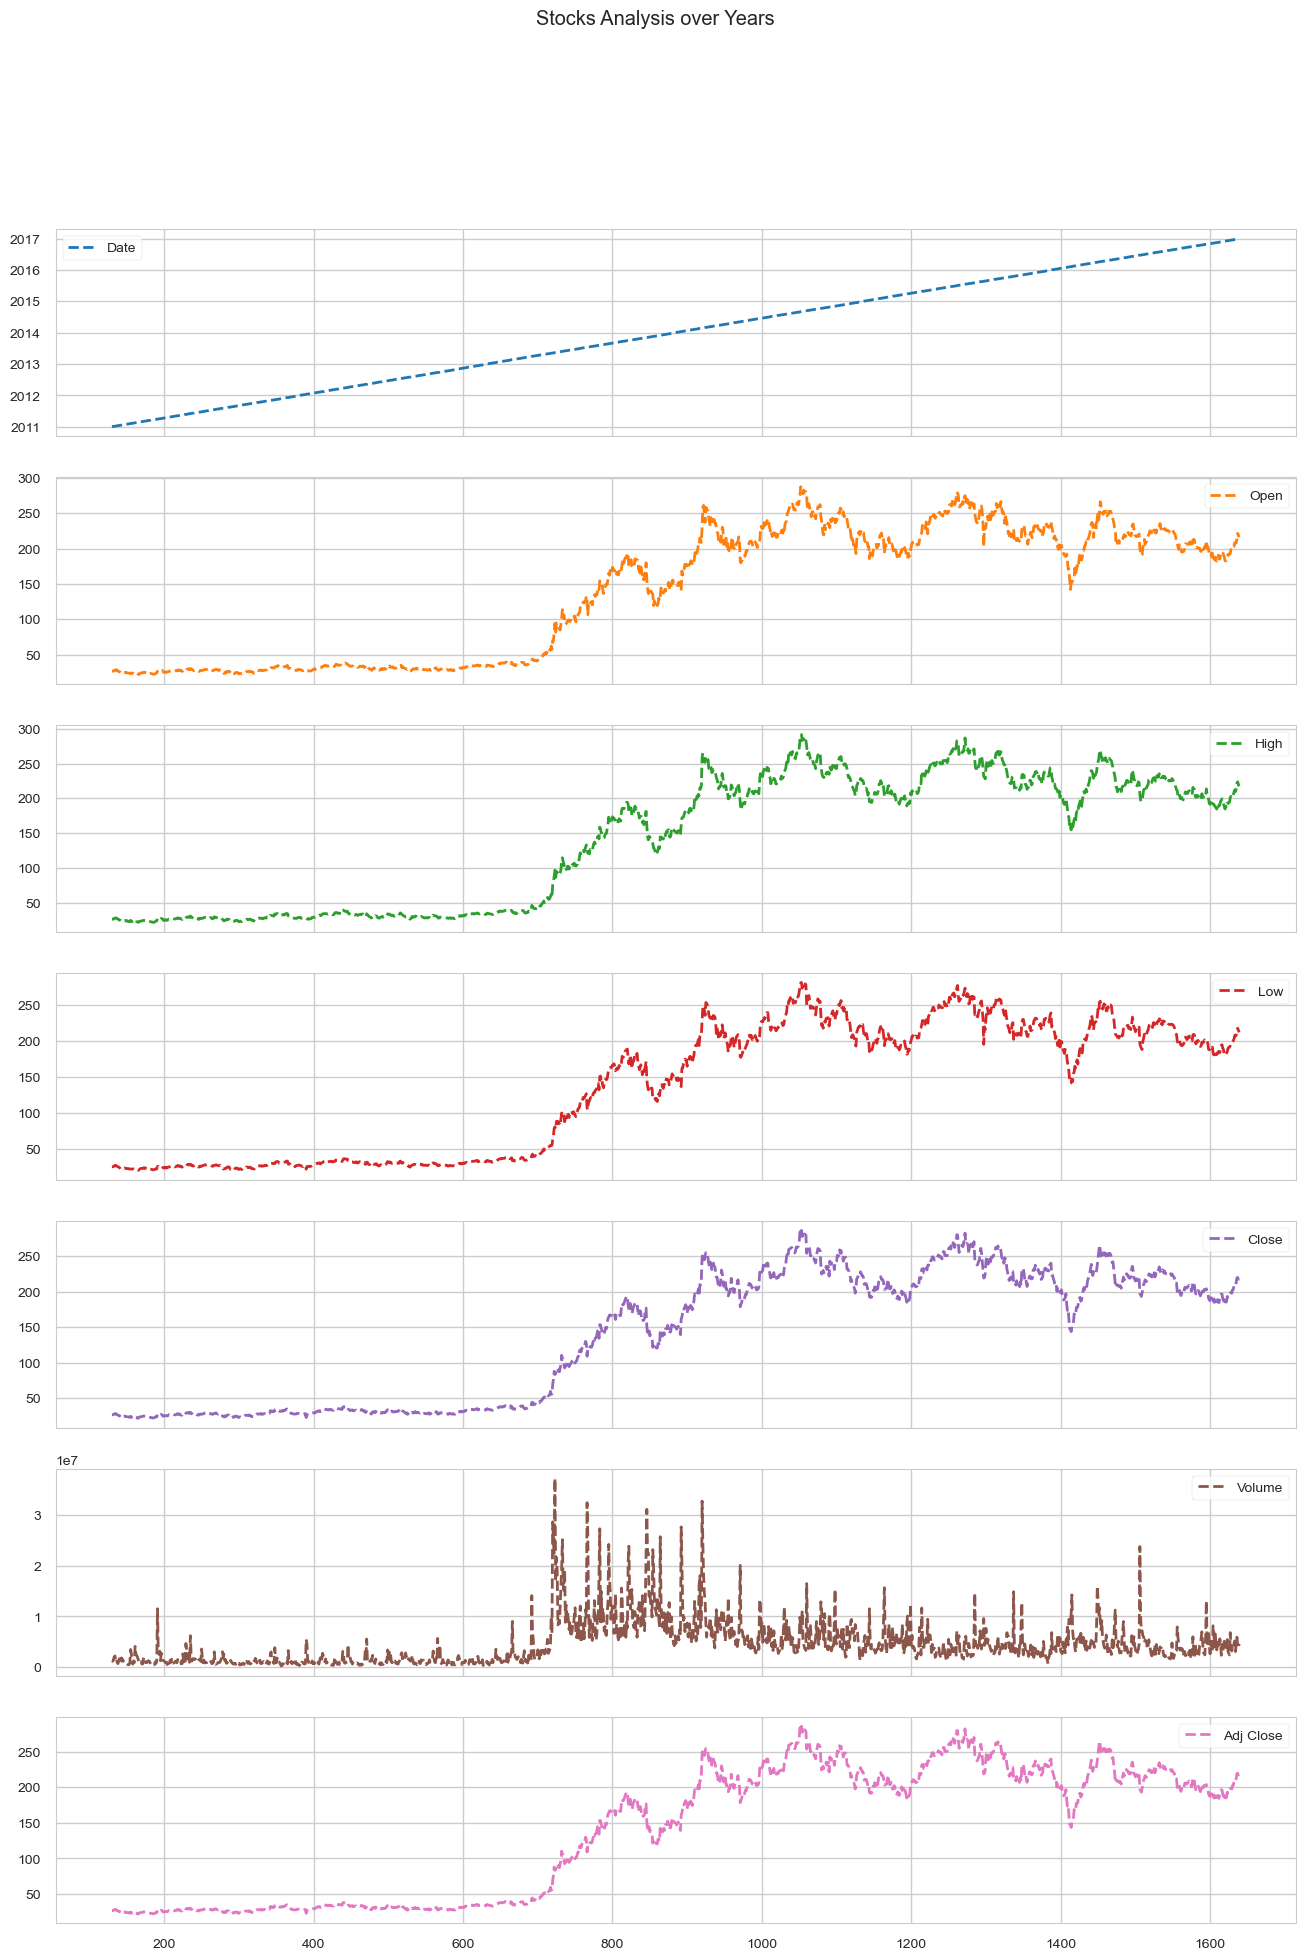

In [73]:
df.plot(subplots=True,figsize=(16,22),title='Stocks Analysis over Years',linestyle='--',linewidth=2)
plt.show() 

In [8]:
#Calculate the correlation
df.corr()

,Open,High,Low,Close,Volume,Adj Close
Open,1.000000,0.999623,0.999605,0.999233,0.407515,0.999233
High,0.999623,1.000000,0.999521,0.999691,0.416466,0.999691
Low,0.999605,0.999521,1.000000,0.999656,0.397615,0.999656
Close,0.999233,0.999691,0.999656,1.000000,0.406907,1.000000
Volume,0.407515,0.416466,0.397615,0.406907,1.000000,0.406907
Adj Close,0.999233,0.999691,0.999656,1.000000,0.406907,1.000000


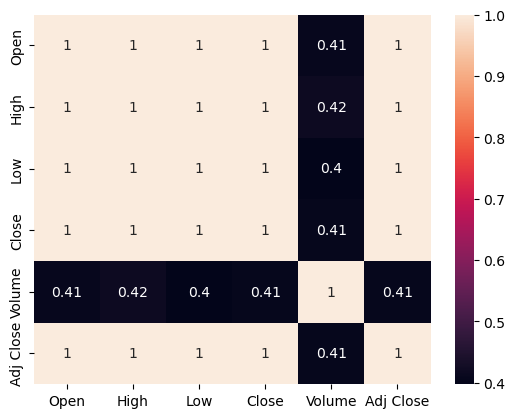

Open         1.324416e+02
High         1.347697e+02
Low          1.299962e+02
Close        1.324287e+02
Volume       4.270741e+06
Adj Close    1.324287e+02
dtype: float64


/var/folders/n1/bp929_sx74q65yzn_wfsq_pc0000gn/T/ipykernel_13824/3987361071.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means = df.mean()


In [9]:
# Calculate the correlation matrix
corrMatrix = df.corr()

# Display the heatmap
sns.heatmap(corrMatrix, annot=True)
plt.show()

# If you want to calculate means, you can do something like this
means = df.mean()
print(means)

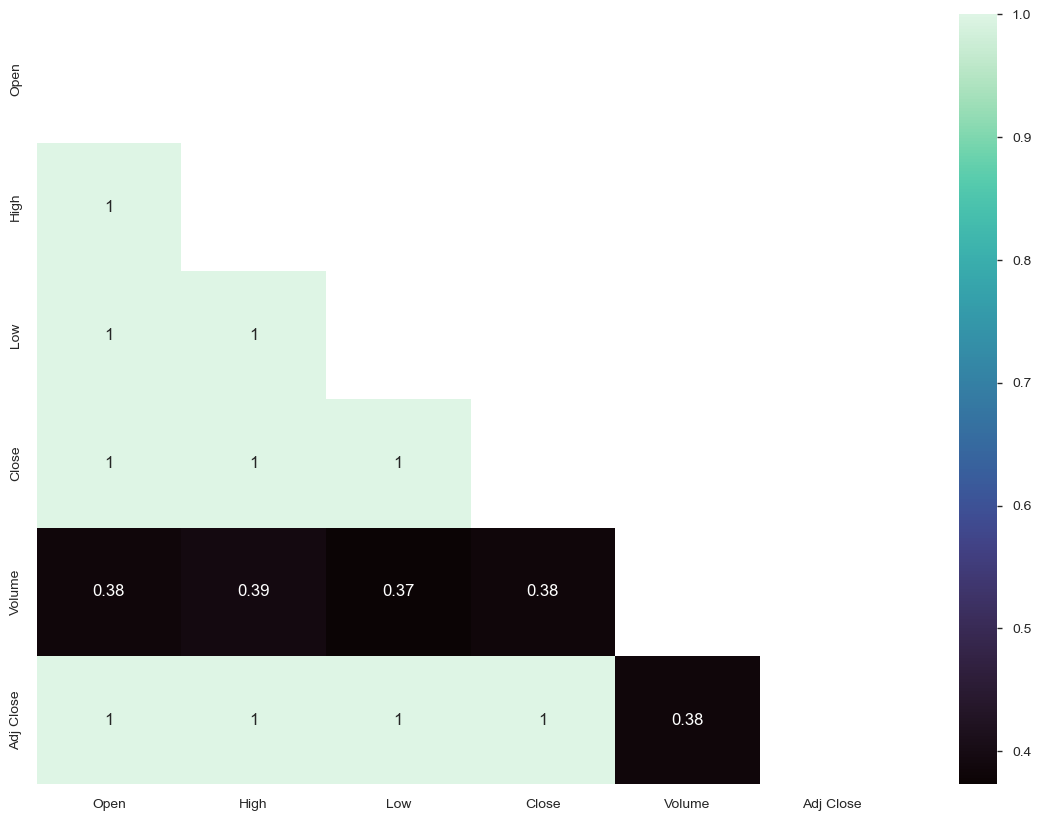

In [83]:
plt.figure(figsize=(14,10))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='mako',mask=np.triu(corr))
plt.show()

<AxesSubplot:xlabel='Date', ylabel='High'>

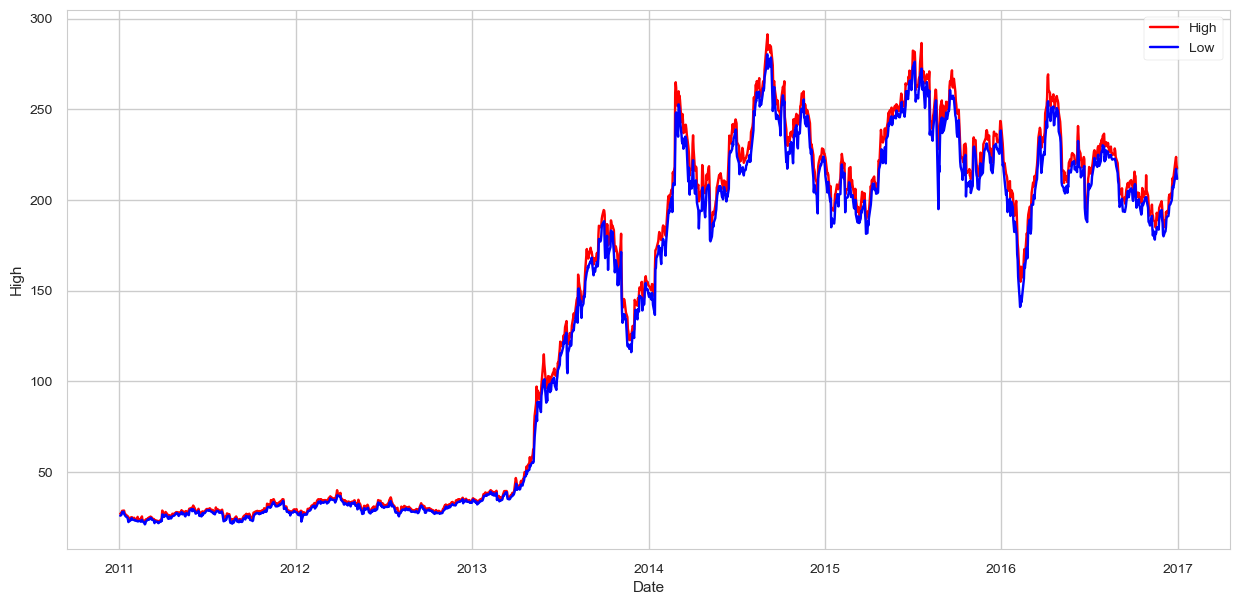

In [82]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=df,x="Date",y="High",color="red",label="High")
sns.lineplot(data=df,x="Date",y="Low",color="blue",label="Low")

In [10]:
# Extracting the year from the 'Date' column and creating a new 'Year' column
df['Year'] = df["Date"].apply(lambda x: x.split('/')[2])

# Extracting the month from the 'Date' column and creating a new 'Month' column
df['Month'] = df["Date"].apply(lambda x: x.split('/')[0])

# Extracting the day from the 'Date' column and creating a new 'Day' column
df['Day'] = df["Date"].apply(lambda x: x.split('/')[1])

In [11]:
# you've converted the 'Date' column in your DataFrame
df['Date']=pd.to_datetime(df["Date"])
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999,2010,6,29
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000,2010,6,30
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999,2010,7,1
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001,2010,7,2
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001,2010,7,6


In [12]:
# Drop rows where the 'Year' column is equal to '2010' or '2017'
df.drop(df[df["Year"] == '2010'].index, inplace=True)
df.drop(df[df["Year"] == '2017'].index, inplace=True)

In [13]:
'''Before droping raw and column 1692 and 7 respectively .
   now after droing its 1510 and 10 '''
df.shape

(1510, 10)

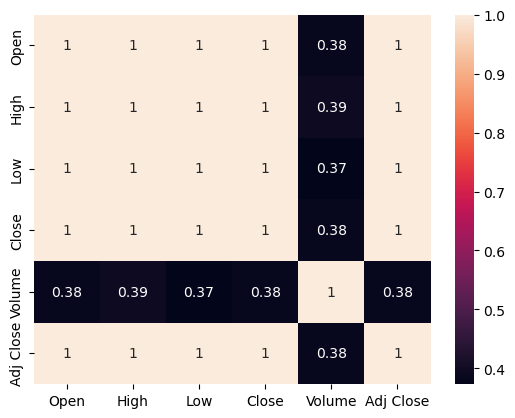

In [14]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

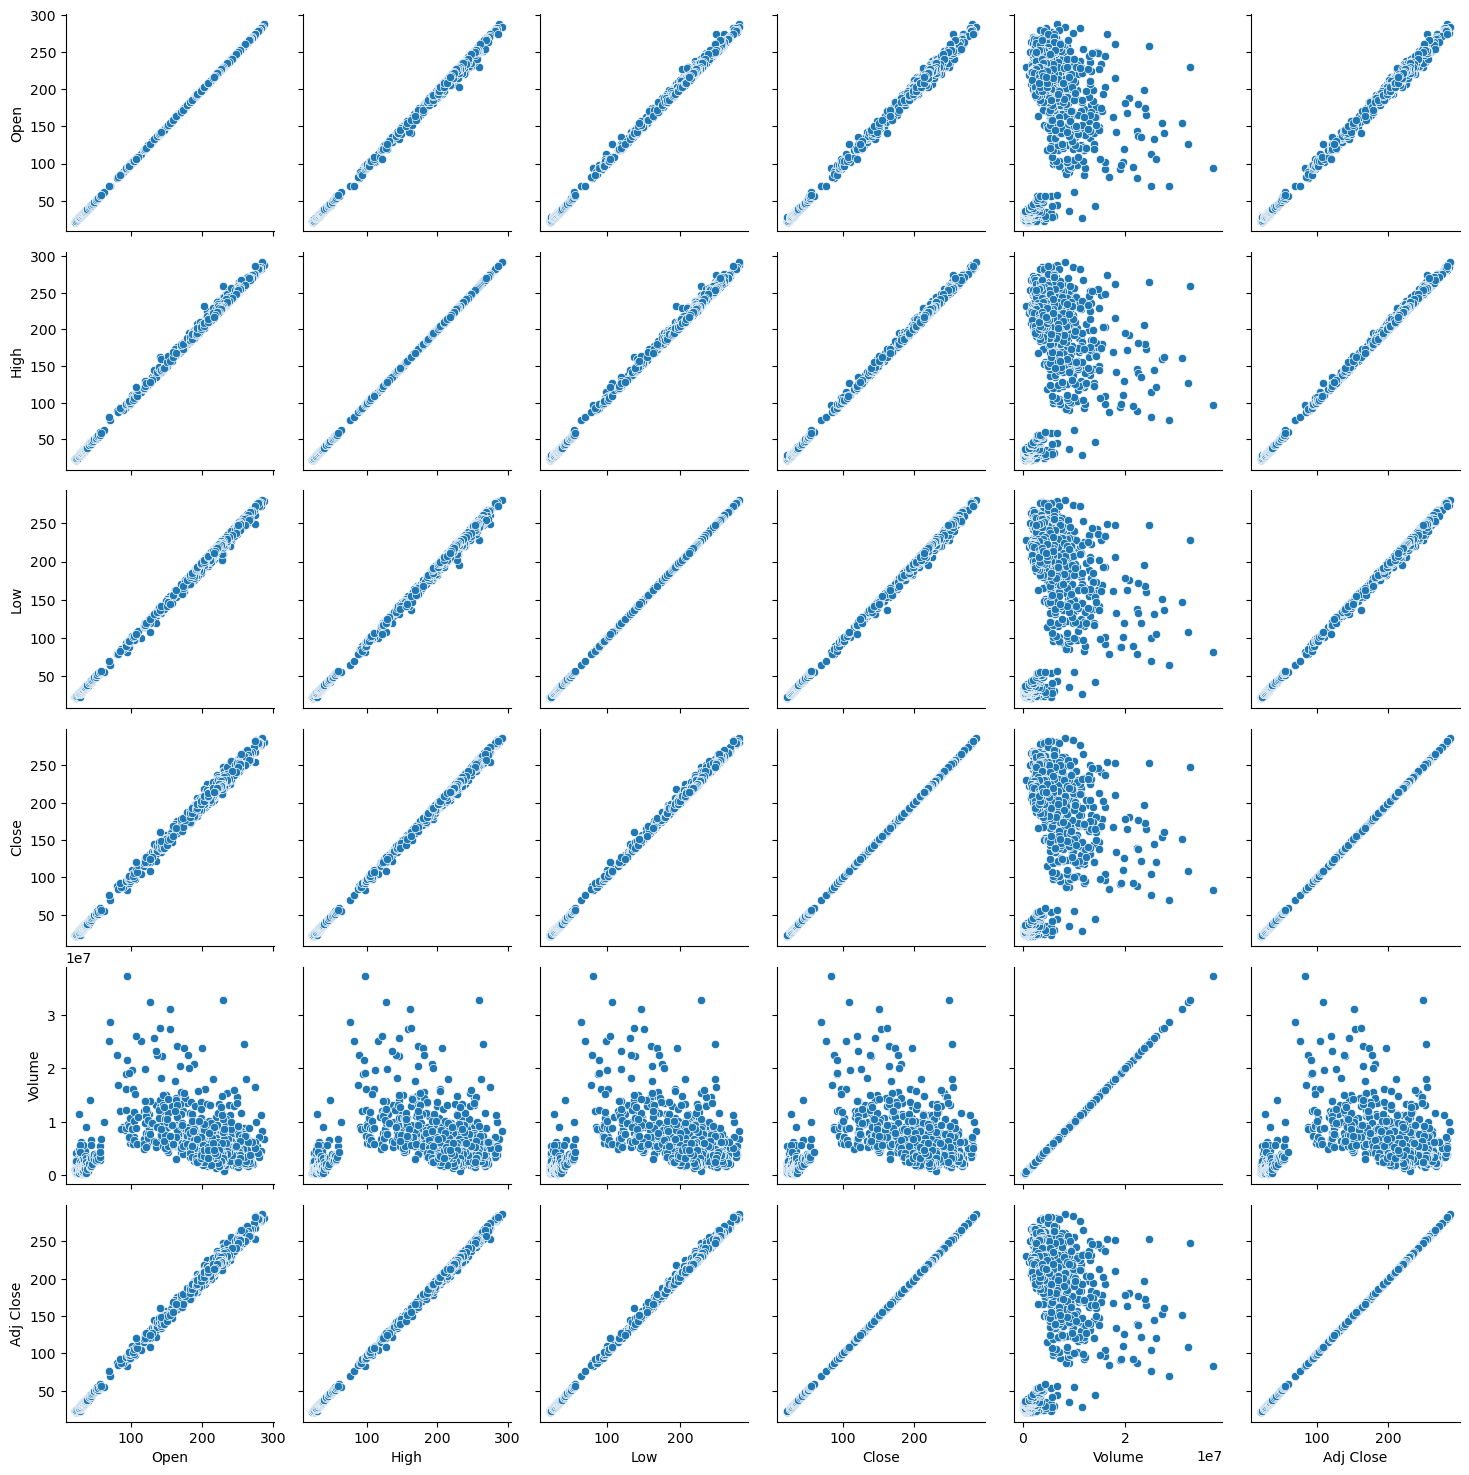

In [15]:
#using Seaborn's PairGrid to create scatterplots for each pair of numerical variables. 
g = sns.PairGrid(df)
g.map(sns.scatterplot)

In [16]:
#The gb_year groupby object to perform various operations on each group.
gb_year=df.groupby("Year")

In [17]:
# Assuming df is your DataFrame and gb_year is your groupby object
# Extract individual groups for each year
df_2011=gb_year.get_group('2011')
df_2012=gb_year.get_group('2012')
df_2013=gb_year.get_group('2013')
df_2014=gb_year.get_group('2014')
df_2015=gb_year.get_group('2015')
df_2016=gb_year.get_group('2016')
# Now you have separate DataFrames for each year (df_2011, df_2012, ..., df_2016)
# You can perform operations or analysis on each individual DataFrame as needed

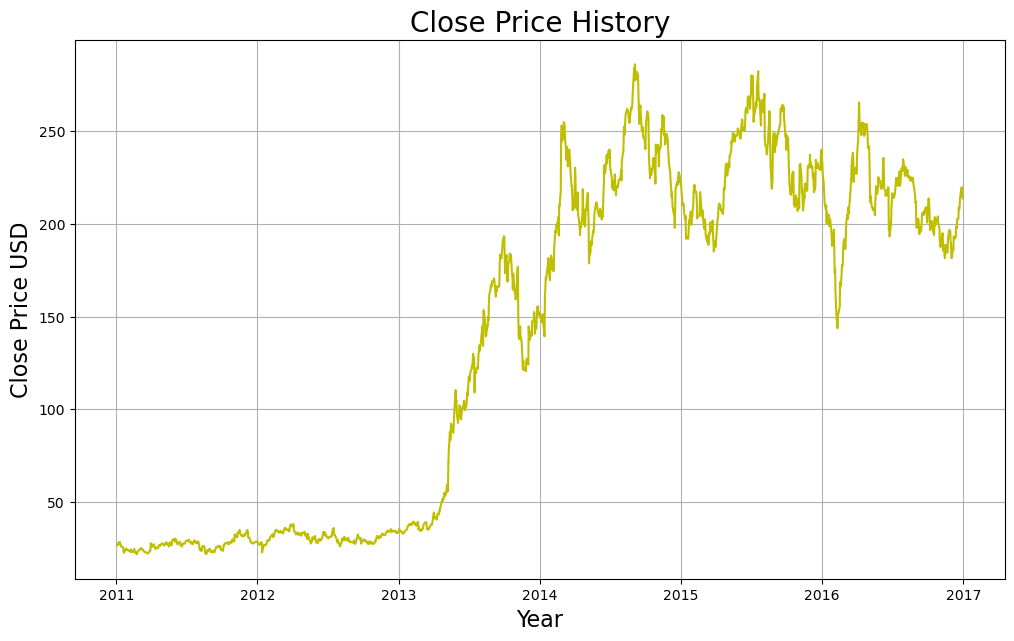

In [18]:
#plotting the data
plt.figure(figsize=(12,7))
plt.title('Close Price History',fontsize=20)
plt.plot(df['Date'],df['Close'], color='y')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Close Price USD', fontsize = 16)
plt.grid(True)
plt.show()

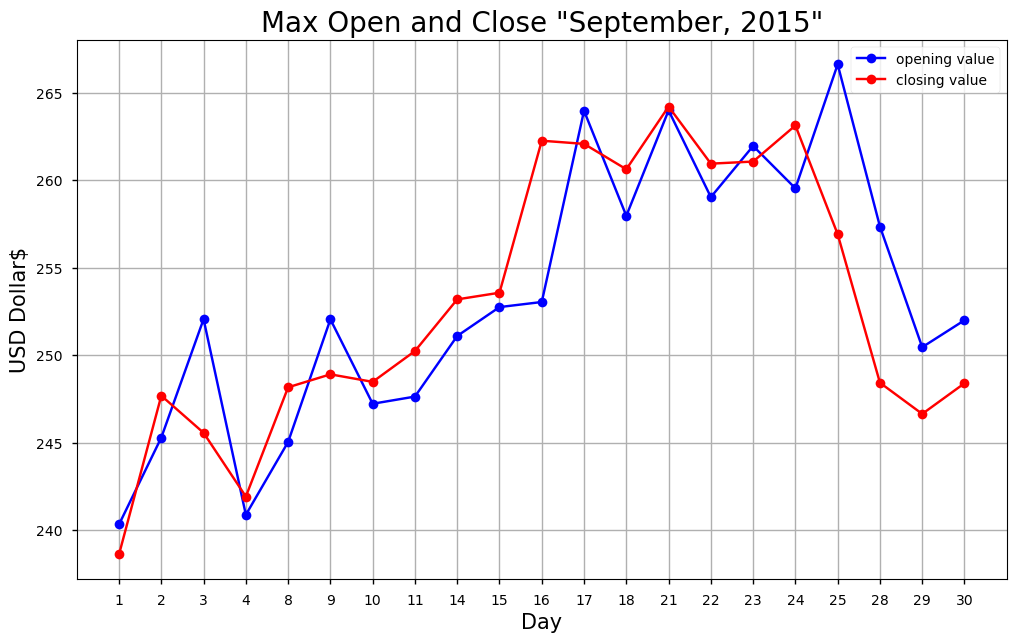

In [19]:
# Filter data for September 2015 from df_2015
df_2015_9 = df_2015[df_2015["Month"] == '9']

# Extracting x, y, and z values for plotting
x = df_2015_9['Day']
y = df_2015_9['Open']
z = df_2015_9['Close']

# Plotting the data
plt.figure(figsize=(12, 7))
plt.style.use('seaborn-notebook')
plt.title('Max Open and Close "September, 2015"', fontsize='20')
plt.plot(x, y, label="opening value", color='b', marker='o')
plt.plot(x, z, label="closing value", color='r', marker='o')
plt.xlabel("Day", fontsize='15')
plt.ylabel('USD Dollar$', fontsize='15')
plt.legend()
plt.grid(True)
plt.show()

plot will visually represent the opening and closing values for each day in September 2015.

In [57]:
# Maximum Open Values
df['Open'].max()

287.670013

In [58]:
# Max Opening data
df[df['Open']==287.670013] 

,Date,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day
1052,2014-09-03,287.670013,288.0,280.100006,281.190002,6772300,281.190002,2014,9,3


Here we got Max opening value is on 3rd september in 2014 which is 287.670013

In [59]:
# Maximum Closing Values
df['Close'].max()

286.040009

In [60]:
#Max Closing data
df[df['Close']==286.040009] 

,Date,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day
1053,2014-09-04,284.01001,291.420013,280.399994,286.040009,8341700,286.040009,2014,9,4


Here we got Max closing value is on 4th september in 2014 which is 286.040009

In [61]:
# Calculate the number of days with profit, loss, and neutral outcomes
profit_days = np.sum(df["Open"] < df['Close'])
loss_days = np.sum(df["Open"] > df['Close'])
neutral_days = np.sum(df["Open"] == df['Close'])

# Convert to int64
profit_days = np.int64(profit_days)
loss_days = np.int64(loss_days)
neutral_days = np.int64(neutral_days)

# Print the results
print('Days of Profit  : {}\nDays of Loss    : {}\nDays of Neutral : {}'.format(profit_days, loss_days, neutral_days))


Days of Profit  : 737
Days of Loss    : 769
Days of Neutral : 4


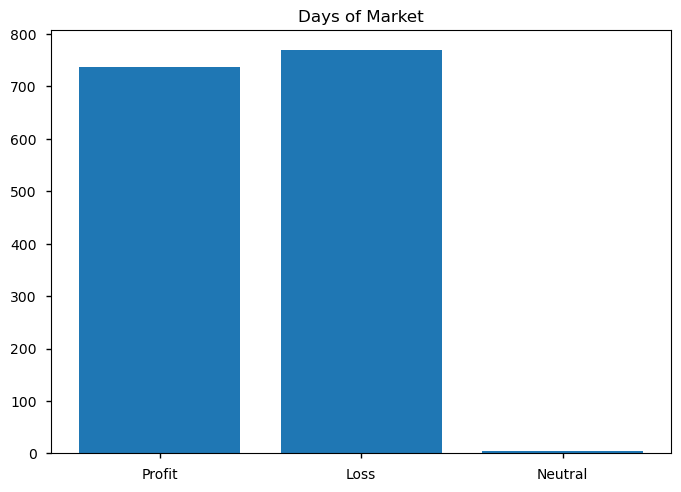

In [25]:
# Assuming we already calculated profit_days, loss_days, and neutral_days

# Plotting the bar chart
plt.title('Days of Market', fontsize='12')

# Creating arrays for x-axis labels and corresponding y-axis values
x = np.array(['Profit', 'Loss', 'Neutral'])
y = np.array([profit_days, loss_days, neutral_days])

# Creating a bar chart
plt.bar(x, y)

# Display the chart
plt.show()

This bar chart will visually represent the counts of days with different market outcomes, allowing you to easily compare the number of days with profit, loss, and neutral results.

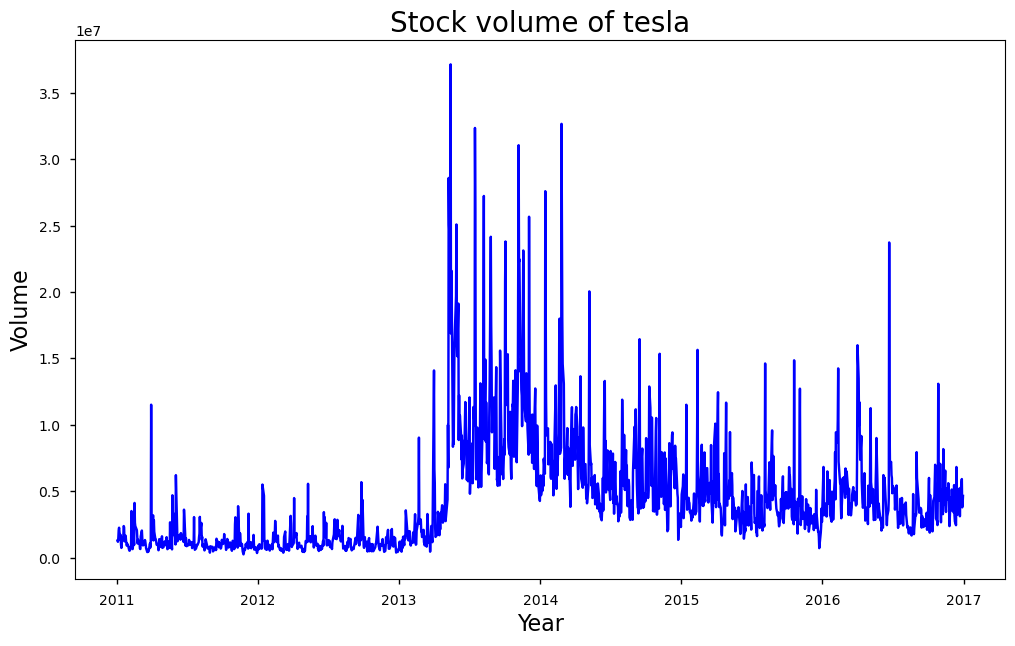

In [26]:
#plotting the data
plt.figure(figsize=(12,7))
plt.title('Stock volume of tesla',fontsize=20)
plt.plot(df['Date'],df['Volume'], color='blue')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Volume', fontsize = 16)
plt.show()

Here we can seen a time-series plot of Tesla's stock volume over time,
providing a visual representation of how the volume changes throughout 
the specified time period. In the middile of year between 2013 to 2014 peak highest number of volume and lowest is in the year between 2012 and 2013 respectively. 

In [27]:
# Max volume value
df['Volume'].max()

37163900

In [28]:
df[df['Volume']==37163900]

,Date,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day
723,2013-05-14,94.220001,97.120003,81.150002,83.239998,37163900,83.239998,2013,5,14


Here we got Mximum value is on 14th may in 2013 which is 37163900

/var/folders/n1/bp929_sx74q65yzn_wfsq_pc0000gn/T/ipykernel_13824/2918219228.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2013_5=df_2013[df["Month"]=='5']


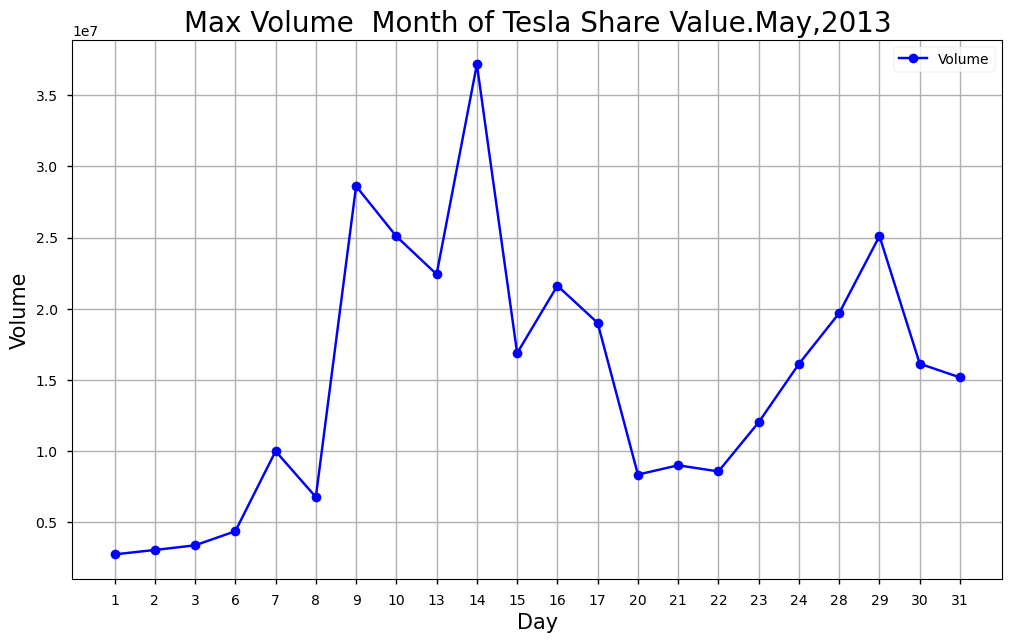

In [29]:
df_2013_5=df_2013[df["Month"]=='5']

x=df_2013_5['Day']
y=df_2013_5['Volume']
plt.figure(figsize=(12,7))
plt.style.use('seaborn-notebook')
plt.title('Max Volume  Month of Tesla Share Value.May,2013',fontsize='20')

plt.plot(x,y,label="Volume",color='b',marker='o')

plt.xlabel("Day",fontsize='15')
plt.ylabel('Volume',fontsize='15')
plt.legend()
plt.grid(True)
plt.show()
         

In [62]:
# Minimum Volume value
df['Volume'].min()

239600

In [31]:
df[df['Volume']==239600]

,Date,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day
357,2011-11-25,31.549999,32.41,31.08,31.66,239600,31.66,2011,11,25


Here we got Minimum value is on 25th september in 2011 which is 239600

/var/folders/n1/bp929_sx74q65yzn_wfsq_pc0000gn/T/ipykernel_13824/3471768830.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2011_11=df_2011[df["Month"]=='11']


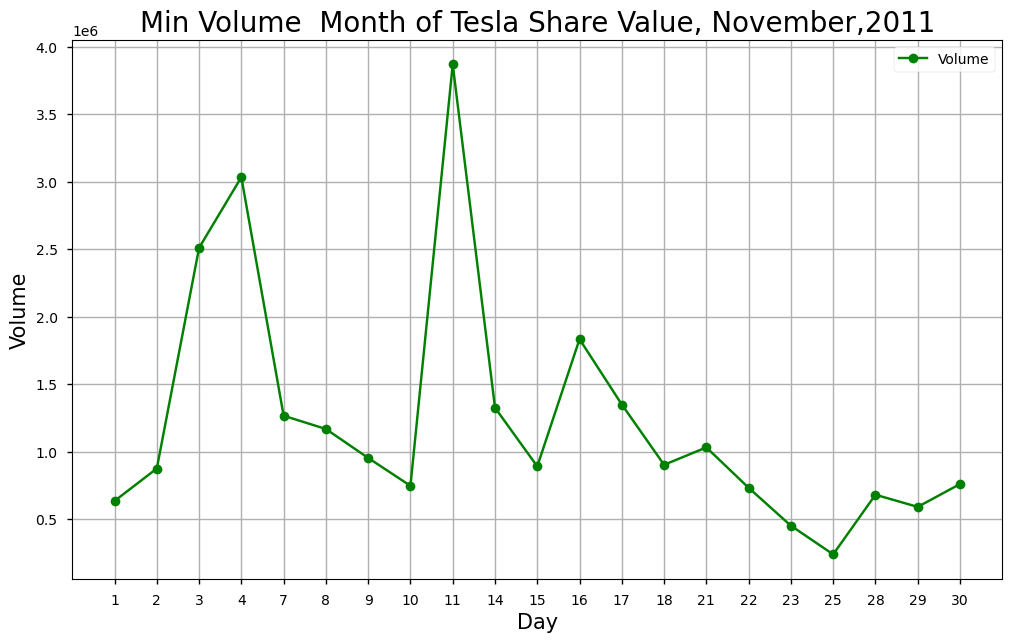

In [32]:
df_2011_11=df_2011[df["Month"]=='11']

x=df_2011_11['Day']
y=df_2011_11['Volume']

plt.figure(figsize=(12,7))
plt.style.use('seaborn-notebook')
plt.title('Min Volume  Month of Tesla Share Value, November,2011',fontsize='20')

plt.plot(x,y,label="Volume",color='g',marker='o')
plt.xlabel("Day",fontsize='15')
plt.ylabel('Volume',fontsize='15')
plt.legend()
plt.grid(True)
plt.show()


Text(0.5, 0.98, 'Opening Value of Tesla 2011-16')

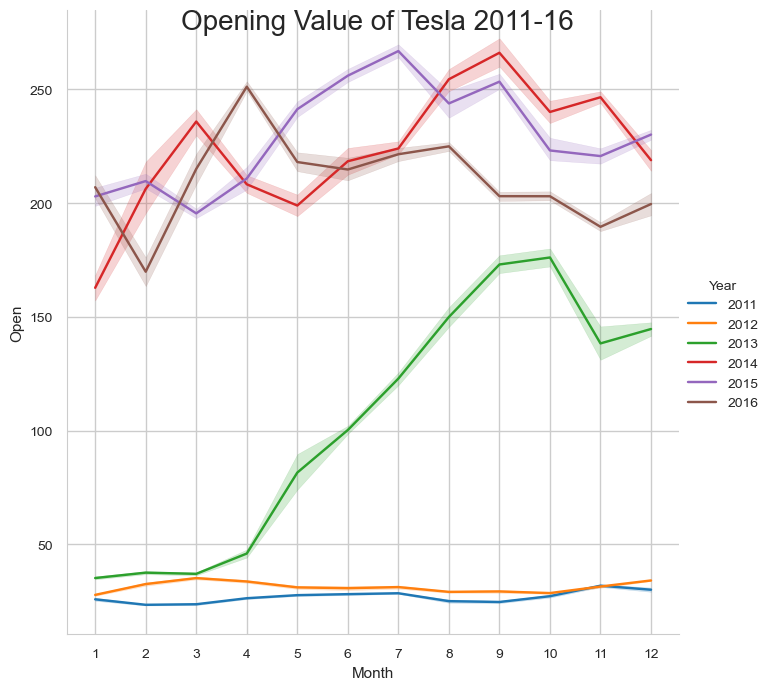

In [33]:
sns.set_style("whitegrid")
sns.relplot(data=df, x="Month", y="Open", hue="Year",kind='line',height=7, aspect=1).fig.suptitle("Opening Value of Tesla 2011-16",
                  fontsize=20, fontdict={"weight": "bold"})

Text(0.5, 0.98, 'Closing Value of Tesla 2011-16')

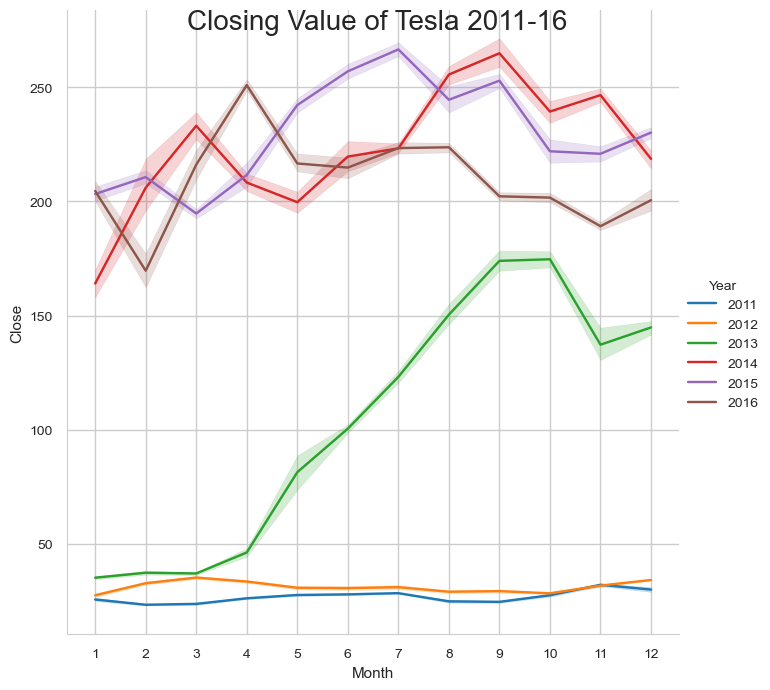

In [34]:
sns.relplot(data=df, x="Month", y="Close", hue="Year",kind='line',height=7, aspect=1).fig.suptitle("Closing Value of Tesla 2011-16",
                  fontsize=20, fontdict={"weight": "bold"})

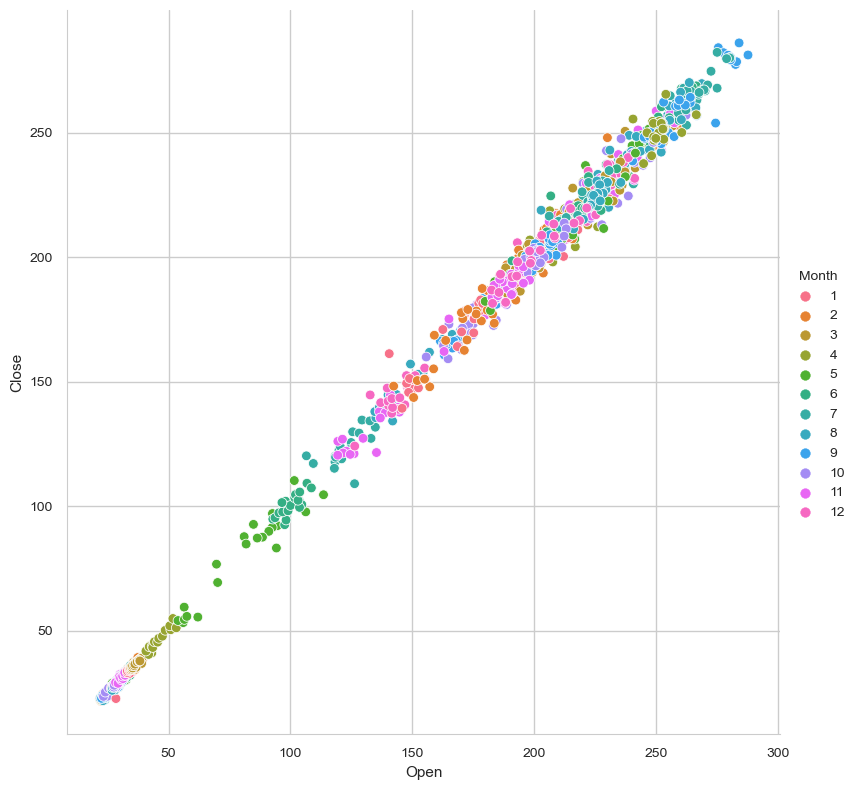

In [35]:
sns.relplot(data=df, x="Open", y="Close",hue='Month',kind='scatter',height=8, aspect=1)

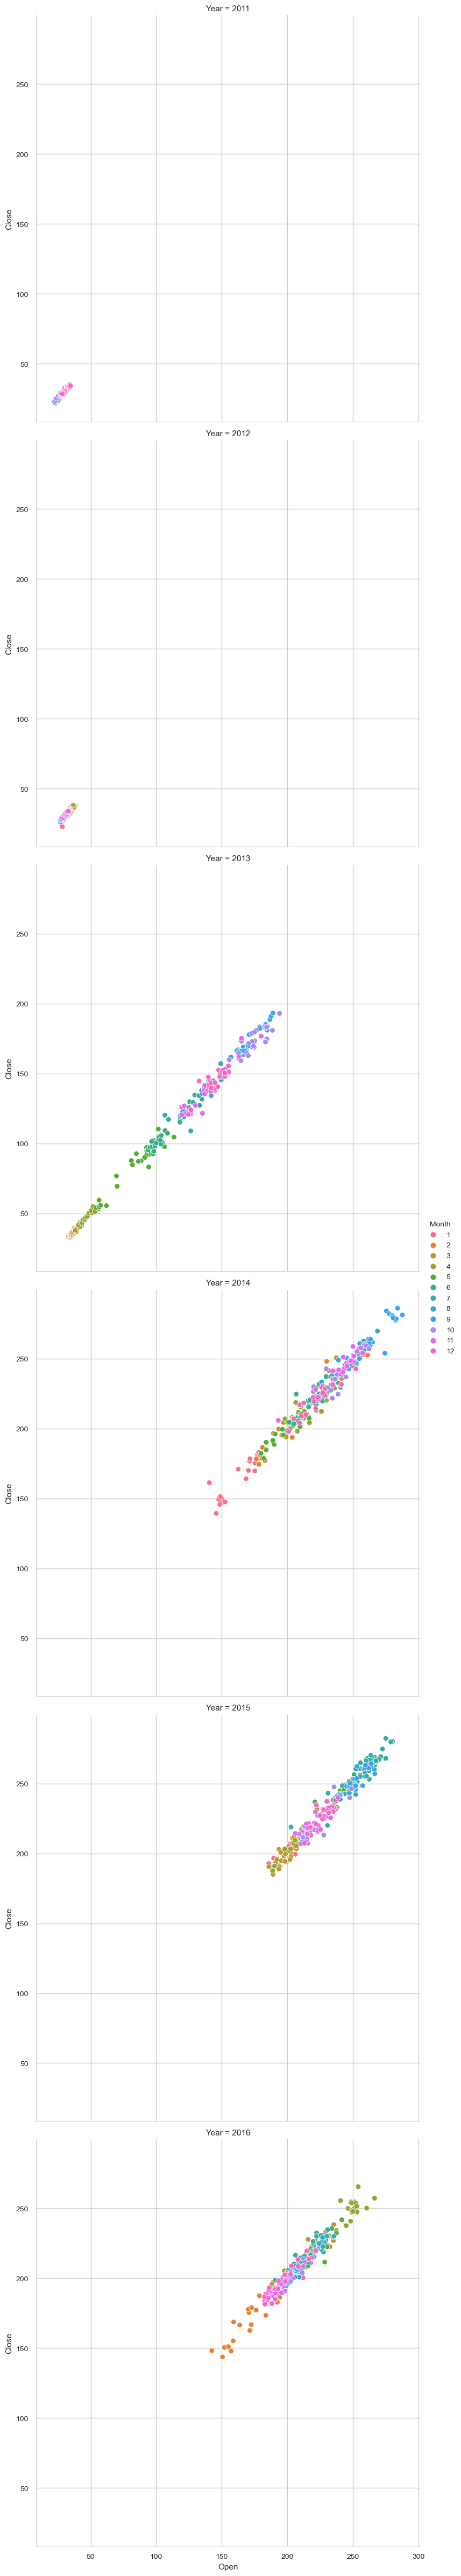

In [36]:
sns.relplot(data=df, x="Open", y="Close",hue='Month',row='Year',kind='scatter',height=8, aspect=1)

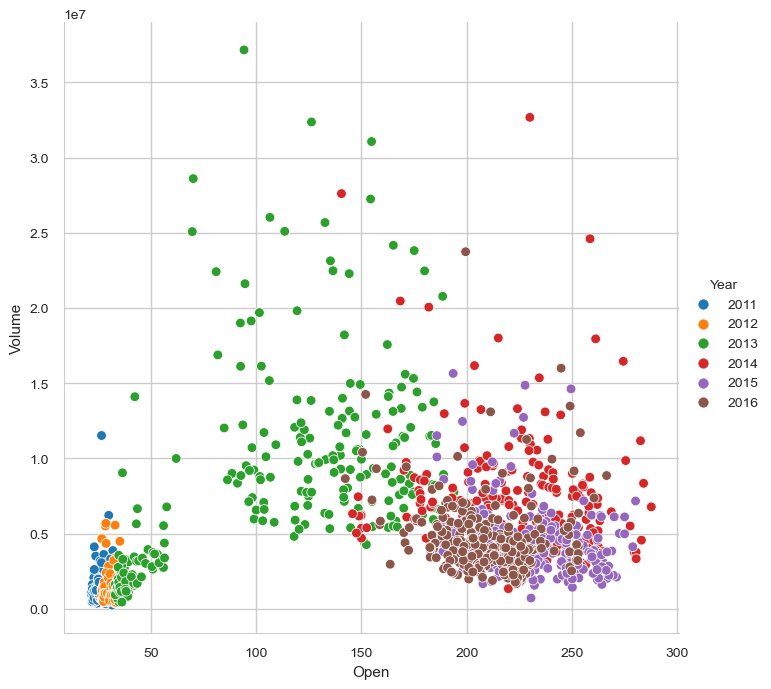

In [37]:
sns.set_style('whitegrid')
sns.relplot(data=df, x="Open", y="Volume",hue='Year',kind='scatter',height=7, aspect=1)

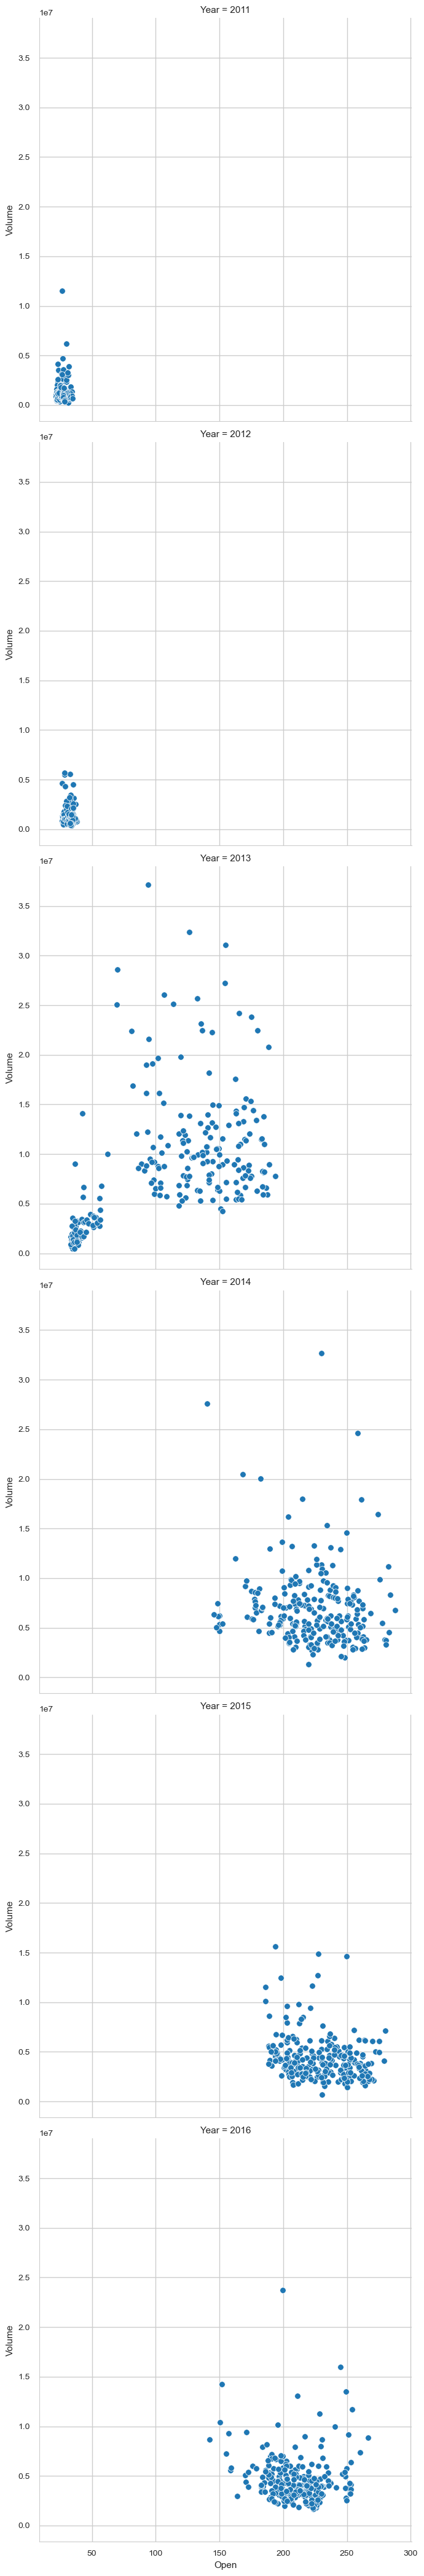

In [38]:
sns.set_style('whitegrid')
sns.relplot(data=df, x="Open", y="Volume",row='Year',kind='scatter',height=7, aspect=1)

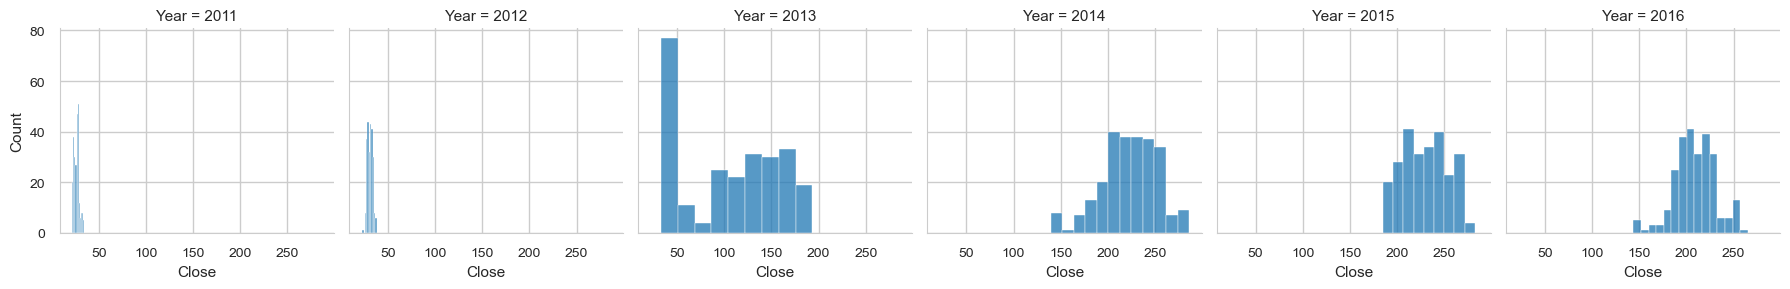

In [39]:
g = sns.FacetGrid(df, col="Year")
g.map(sns.histplot, "Close")

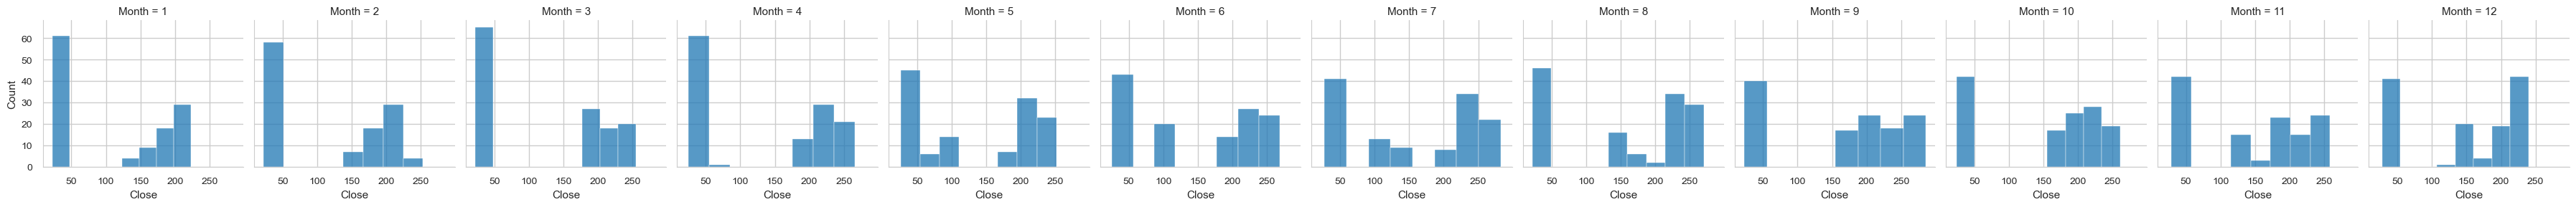

In [40]:
g=sns.FacetGrid(data=df, col="Month")
g.map(sns.histplot, "Close")

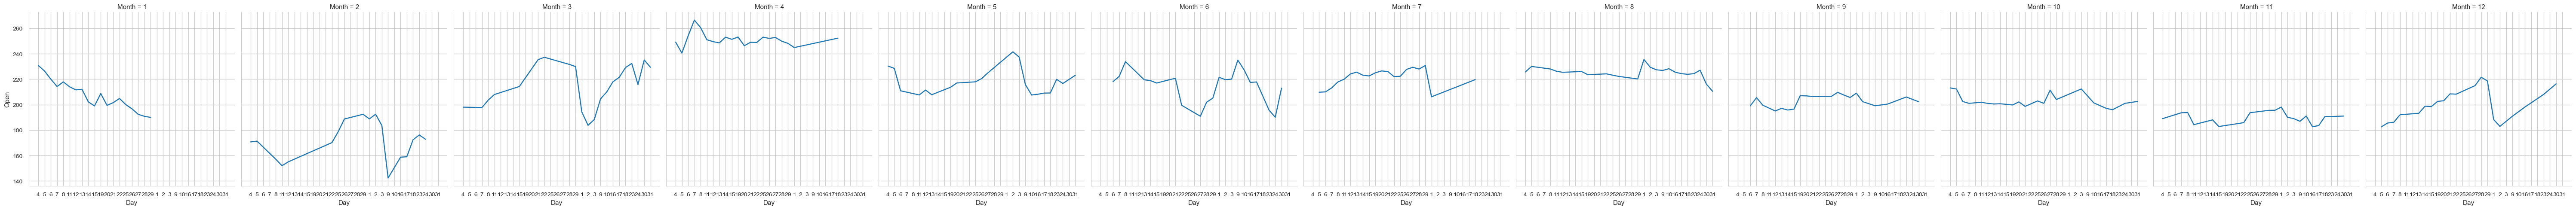

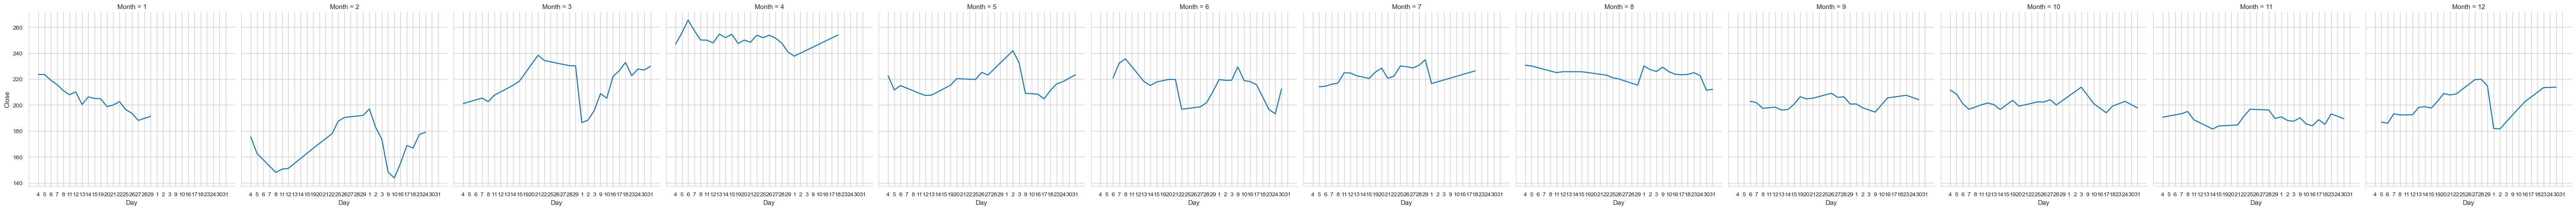

In [41]:
sns.relplot(data=df_2016, x="Day", y="Open",col="Month",kind='line',height=5, aspect=1)
sns.relplot(data=df_2016, x="Day", y="Close",col="Month",kind='line',height=5, aspect=1)

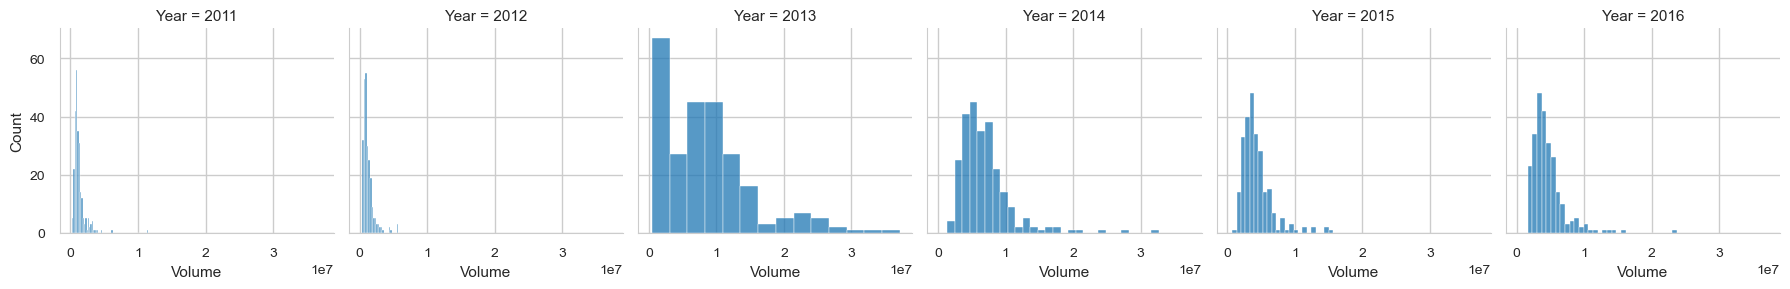

In [42]:
g=sns.FacetGrid(data=df, col="Year")
g.map(sns.histplot, "Volume")

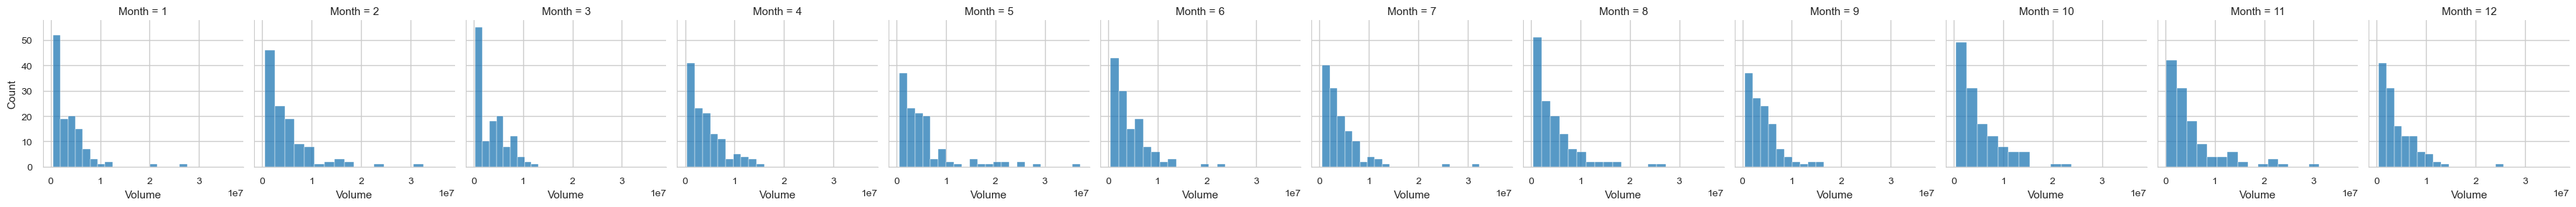

In [43]:
g=sns.FacetGrid(data=df, col="Month")
g.map(sns.histplot, "Volume")

## Let's Prediction Our Result

In [44]:
# Create a copy of DataFrame (data), removes the specified columns.
data=df.copy()
data=data.drop(['Date','Adj Close'],axis=1)

In [45]:
# X is created by dropping the 'Close' column from the DataFrame
X=data.drop('Close',axis=1)
y=data['Close']

In [46]:
# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

### Linear Regression

In [47]:

from sklearn import linear_model, metrics
from sklearn.metrics import r2_score
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [48]:
print(model.intercept_)

91.40028256931456


In [49]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result.head(10)

,Actual,Predicted
702,43.299999,42.893029
1113,244.520004,244.225137
912,195.320007,196.406334
666,35.160000,35.457611
1274,267.869995,267.479381
439,37.400002,37.134531
1495,232.339996,231.537122
378,28.570000,28.647484
311,25.850000,26.642230
221,27.549999,27.652721


<AxesSubplot:>

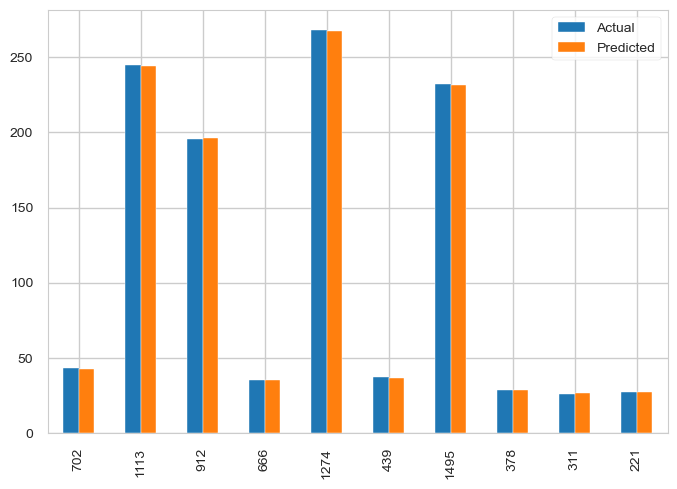

In [71]:
graph = result.head(10)
graph.plot(kind='bar')

In [51]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('r2_score:', r2)


Mean Absolute Error: 1.0479945684563459
Mean Squared Error: 2.2451342764474815
Root Mean Squared Error: 1.498377214338059
r2_score: 0.9997346727583086


### KNN

In [52]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=50)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [53]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('r2_score:', r2)

Mean Absolute Error: 34.836743397513224
Mean Squared Error: 2883.4872456850667
Root Mean Squared Error: 53.698112124031574
r2_score: 0.6592329797929102


### Random Forest

In [54]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
rf_model.fit(X_train, y_train) 
y_pred = rf_model.predict(X_test)

In [55]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('r2_score:', r2)

Mean Absolute Error: 1.3402500524867795
Mean Squared Error: 4.294816398647397
Root Mean Squared Error: 2.0723938811546896
r2_score: 0.9994924438147962
